In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual

In [2]:
# Agregamos DNL_unq al PATH para poder caragar la libreria putils
# Si estamos en Colab primero autorizamos montar nuestro Drive en Colab (se va a abrir una ventana emergente y hay que autorizar)
# y luego agregamos la ruta de la carpeta al PATH
try:  
    from google.colab import drive
    import sys
    drive.mount('/content/drive')
    ### ATENCION MUY IMPORTANTE CAMBIAR ESTA RUTA PARA QUE SEA IGUAL QUE LA QUE TIENEN EN SU DRIVE, a partir de MyDrive/
    sys.path.append('/content/drive/MyDrive/DNL_unq')
except:
    print("No en Colab")    
from putils import *    

No en Colab


# Oscilador armonico
Sistema lineal que depende se un solo parametro K

Ecuaciones diferenciales de primer orden lineales correspondientes al oscilador armonico.
$x$ corresponde a la posicion del oscilador e $y$ a su velocidad.

$ \dot{x} = y $ 

$\dot{y} = -Kx$

La primera ecuacion solo especifica que la variacion temporal de la posicion corresponde a la velocidad. 

La segunda ecuacion, que proviene de la segunda Ley de Newton combinada con la Ley de Hooke especifica que la variacion de la velocidad (aceleracion) es propocional a la posicion con una constante $K$ y signo negativo

In [3]:
# Oscilador simple
def osc_harm(t, x, K):
    return [
        x[1],
        -K*x[0],
    ]

## Calculo de las trayectorias
Para resolver (integrar) usamos la funcion **solve_plot** de putils

**solve_plot** necesita como argumentos:
1. la funcion que define el sistema dinamico (en este caso osc_harm)
2. los parametros del sistema como un diccionario 'nombre':valor
3. la condicion inicial como un array [x0,x1] en nuestro caso
4. el tiempo maximo
5. (opcional) el paso de integracion

Para facilitar esto definimos una funcion ad-hoc que despues vamos a poder hacer interactiva

In [4]:
# armamos trayectoria de entrenamiento partiendo de (0.1, 0)
def solve_osc_harm(K,x0,x1,tmax):
    dt = 0.1
    par={'K':K}
    return solve_plot(osc_harm,par,[x0,x1],tmax,dt)

## Evolucion temporal y Retrato de fases
Podemos graficar la solucion del sistema y el retrato de fases para un valor particular del parametro y de la condicion inicial

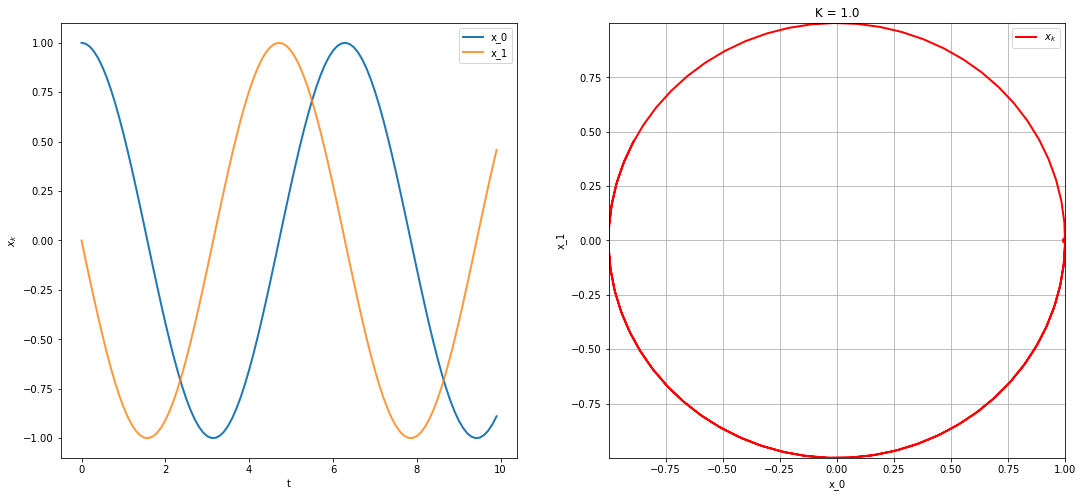

In [5]:
solve_osc_harm(1.0,1.0,0,10)

## Interaccion
usando el ipywidget interactive podemos darle un rango al parametro, la condicion incial y el tiempo maximo de integracion y jugar con eso de forma interactiva 

In [6]:
iplot0 = interactive(solve_osc_harm,
                    K=(0,2.0,0.01),
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,30,1))

iplot0

interactive(children=(FloatSlider(value=1.0, description='K', max=2.0, step=0.01), FloatSlider(value=0.0, desc…

 # Bouncing Ball
    
Una bola bajo la accion de la gravedad **G** para x>0 y que rebota con un resorte que ejerce fuerza de parametro **K** para x<0

Las ecuaciones tienen una discontinuidad en $x=0$ ya que para $x>0$ solo actua la gravedad y para $x<0$ actua ademas la fuerza elastica del rebote. 

Necesitamos separar entonces la segunda ecuacion en dos partes con un condicional:
\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -G  \quad \quad \quad \quad (x>0) \\
        & =  -G-Kx \quad \quad  (x\leq 0 )
\end{aligned}

In [7]:
def osc_bounce(t, x, K,G):
    if (x[0]>0):
        return [
            x[1],
            -G,
        ]
    else:
        return [
            x[1],
            -G-K*x[0],
        ]

In [7]:
def solve_osc_bounce(K,G,x0,x1,tmax):
    dt = 0.1
    par={'K':K,'G':G}
    return solve_plot(osc_bounce,par,[x0,x1],tmax,dt)

In [8]:
iplot1 = interactive(solve_osc_bounce,
                    K=(0,300.0,0.01),
                    G=(0,1,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,20,1))
iplot1

interactive(children=(FloatSlider(value=150.0, description='K', max=300.0, step=0.01), FloatSlider(value=0.0, …

# Bouncing Ball con disipacion
Ahora aparece una fuerza de friccion que depende de la velocidad controlada por un parametro C

\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -G-Cy  \quad \quad \quad \quad (x>0) \\
        & =  -G-Kx-Cy \quad \quad  (x\leq 0 )
\end{aligned}

In [9]:
def osc_bounce2(t,x,K,G,C):
    if (x[0]>0):
        return [
            x[1],
            -G-C*x[1],
        ]
    else:
        return [
            x[1],
            -G-C*x[1]-K*x[0],
        ]

In [10]:
def solve_osc_bounce2(K,G,C,x0,x1,tmax):
    dt = 0.1
    par={'K':K,'G':G,'C':C}
    return solve_plot(osc_bounce2,par,[x0,x1],tmax,dt)

iplot2 = interactive(solve_osc_bounce2,
                    K=(0,300.0,0.01),
                    G=(0,1,0.01), 
                    C=(0,0.5,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,20,1))

iplot2

interactive(children=(FloatSlider(value=150.0, description='K', max=300.0, step=0.01), FloatSlider(value=0.0, …

# Oscilador armonico con disipacion

En este caso tambien actua la friccion que depende de la velocidad y depende del parametro C

\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -Kx-Cy  
\end{aligned}

In [11]:
def osc_harm2(t, x, K, C):
    return [
        x[1],
        -K*x[0]-C*x[1],
    ]

In [12]:
def solve_osc_harm2(K,C,x0,x1,tmax):
    dt = 0.1
    par={'K':K,'C':C}
    return solve_plot(osc_harm2,par,[x0,x1],tmax,dt)

iplot3 = interactive(solve_osc_harm2,
                    K=(0,1.0,0.01),
                    C=(0,2,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,100,1))

iplot3

interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

# Oscilador No Lineal : Van der Pol
En este caso el termino de disipacion es no lineal y en lugar de C es igual a $C(x^2-1)$
de forma tal que cuando x es menor que 1 la disipacion es **negativa** y actua como una fuente de energia


\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -Kx-Cy(x^2-1)  
\end{aligned}

In [13]:
def van_der_pol(t, x, K, C):
    return [
        x[1],
        -K*x[0]-C*x[1]*(x[0]*x[0]-1),
    ]
    

In [14]:
def solve_van_der_pol(K,C,x0,x1,tmax):
    dt = 0.1
    par={'K':K,'C':C}
    return solve_plot(van_der_pol,par,[x0,x1],tmax,dt,ranges=[[-5,5],[-5,5]])

iplot4 = interactive(solve_van_der_pol,
                    K=(0,1.0,0.01),
                    C=(0,3.0,0.01), 
                    x0=(-3,3,0.01),
                    x1=(-3,3,0.01),
                    tmax=(1,100,1))

iplot4

interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=1.5, desc…

# Analisis armonico

In [15]:
def solve_van_der_pol_fft(K,C,x0,x1,tmax,fmax):
    dt = 0.1
    par={'K':K,'C':C}
    return solve_plot(van_der_pol,par,[x0,x1],tmax,dt,ranges=[[-3,3],[-8,8]],fmax=fmax,wfft=True)


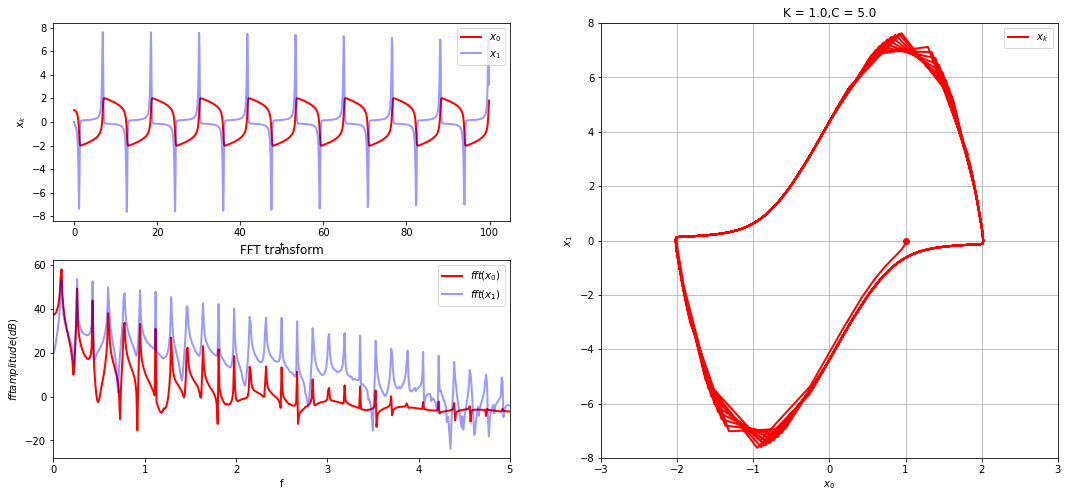

In [16]:
solve_van_der_pol_fft(1.0,5.0,1,0,100,5)

In [17]:
iplot5 = interact_manual(solve_van_der_pol_fft,
                    K=(0,1.0,0.01),
                    C=(0,5.0,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,100,1),
                    fmax=(1,10,0.1),)


interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=2.5, desc…

# FitzHugh Nagumo Forzado

$\dot{x} = x(x-1)(1-\alpha x)-y+I \cos{\phi}$ 

$\dot{y} = bx$

$\dot{\phi} = \omega$

In [18]:
def fitzhugh(t, x, α, b, v, I, w):
    return [
        x[0]*(x[0]-1)*(1-α*x[0])-x[1]+I*np.cos(x[2]),
        b*x[0]-v*x[1],
        w,
    ]
    

In [19]:
def solve_fitzhugh(α,b,v,I,x0,x1,w,tmax):
    dt = 0.1
    par={'α':α,'b':b,'v':v,'I':I,'w':w}
    return solve_plot(fitzhugh,par,[x0,x1,0],tmax,dt,ranges=[[-1,1],[-1,2]])

iplot5 = interactive(solve_fitzhugh,
                    α=(0,10.0,0.01),
                    b=(0,1.0,0.01),
                    v=(0,1.0,0.01),
                    I=(0,2.0,0.01), 
                    w=(0,3.0,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,1000,1))

iplot5

interactive(children=(FloatSlider(value=5.0, description='α', max=10.0, step=0.01), FloatSlider(value=0.5, des…

# Duffing Forzado

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 + \alpha cos(\phi)$

$\dot{\phi} = \omega$



In [5]:
def duffing(t, x, α, β, γ, ω):
    return [
        x[1],
        -γ*x[1]+x[0]*(β-x[0]**2)+α*np.cos(x[2]),
        -ω,
    ]

In [7]:
def solve_duffing(α,β,γ,ω,x0,x1,tmax):
    dt = 0.1
    par={'α':α,'β':β,'γ':γ,'ω':ω}
    return solve_plot(duffing,par,[x0,x1,0],tmax,dt,ranges=[[-2,2],[-2,2]])

iplot6 = interactive(solve_duffing,
                    α=(0,1.0,0.01),
                    β=(-1.0,1.0,0.01),
                    γ=(0,1.0,0.01),
                    ω=(0,3.0,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,1000,1))

iplot6

interactive(children=(FloatSlider(value=0.5, description='α', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

# Duffing - Van der Pol

$\dot{x} = y$

$\dot{y} = -(\alpha+\beta x^2) y + \gamma x - x^3$



In [22]:
def duffing_vdp(t, x, α, β, γ):
    return [
        x[1],
        -(α+β*x[0]**2)*x[1]+x[0]*(γ-x[0]**2),
    ]

In [25]:
def solve_duffing_vdp(α,β,γ,x0,x1,tmax):
    dt = 0.1
    par={'α':α,'β':β,'γ':γ}
    return solve_plot(duffing_vdp,par,[x0,x1],tmax,dt,ranges=[[-2,2],[-1,1]])

iplot6 = interactive(solve_duffing_vdp,
                    α=(-1.0,1.0,0.01),
                    β=(-1.0,1.0,0.01),
                    γ=(-1.0,1.0,0.01),
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,1000,1))

iplot6

interactive(children=(FloatSlider(value=0.0, description='α', max=1.0, min=-1.0, step=0.01), FloatSlider(value…